# Problem

A healthcare organization together with couple of government hospitals in a city has collected information about the vitals that would reveal if the person might have a coronary heart disease in the next ten years or not. This study is useful in early identifiaction of disease and have medical intervention if necessary. This would help not only in improving thr health conditions but also the economy as it has been identified that health performance and economic performance are interlinked.

## Task and Approch

The task is to construct a classification model based on available data and evaluate its efficiency.
Preparing the dataset for analysis, checking for any correlation, creating a model, and evaluating the performance of the classification model.

## Import the dependencies and understanding the data

pandas , seaborn and matplotlib.pyplot are imported with aliases pd, sns and plt respectively

In [1]:
# Data analysis
import pandas as pd
# Visualization and Plotting
import matplotlib.pyplot as plt
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset to a pandas dataframe
df=pd.read_csv("Project Dataset.csv")
df.head()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,1443894,2049,44,8.0,11,0,0,0,0,38,...,0,0.52,0.69,0,0,0,1,17.078971,0,0
1,1810849,48,0,8.0,0,0,0,0,0,1,...,0,0.59,0.78,1,0,0,1,17.022384,0,0
2,2264999,318,2,9.0,0,0,0,0,0,0,...,0,0.94,0.79,1,0,0,0,17.024773,0,0
3,1931676,62,4,2.0,0,0,0,15,30,7,...,0,0.51,0.47,0,0,0,1,17.074995,0,0
4,2070885,2,0,8.0,0,0,0,0,1,0,...,0,0.82,0.81,0,0,0,1,17.072697,0,0


In [3]:
# no.of rows and columns
print('We have',df.shape[0],'customers of data with',df.shape[1], 'columns')

We have 34281 customers of data with 25 columns


## EDA

In [4]:
# check the descriptive statistics of the data
df.describe(include='all')

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
count,3.428100e+04,34281.000000,34281.000000,32538.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,...,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000
mean,1.979838e+06,236.252005,36.126367,7.355185,22.543071,1.695371,151.959044,274.418453,387.933637,36.482746,...,1.744757,-5.742893,-5.368822,0.208658,0.000321,0.131939,0.962370,17.049826,0.000204,0.329424
std,6.384855e+05,3326.574620,427.707021,6.165307,359.486291,36.195759,2274.087109,4065.441226,5443.804648,375.931751,...,26.077507,24.618128,23.938095,0.406355,0.017910,0.338429,0.190303,0.028818,0.014288,0.470011
min,1.058628e+06,-2999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,17.000005,0.000000,0.000000
25%,1.464342e+06,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.590000,0.610000,0.000000,0.000000,0.000000,1.000000,17.024869,0.000000,0.000000
50%,1.841719e+06,8.000000,0.000000,8.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,...,0.000000,0.810000,0.790000,0.000000,0.000000,0.000000,1.000000,17.049813,0.000000,0.000000
75%,2.254242e+06,40.000000,4.000000,8.000000,0.000000,0.000000,18.000000,33.000000,48.000000,6.000000,...,0.000000,0.960000,0.940000,0.000000,0.000000,0.000000,1.000000,17.074796,0.000000,1.000000
max,3.274754e+06,366924.000000,50547.000000,52.000000,31750.000000,2999.000000,260660.000000,438020.000000,533540.000000,21071.000000,...,1488.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.099995,1.000000,1.000000


In [5]:
# checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34281 entries, 0 to 34280
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      34281 non-null  int64  
 1   IV      34281 non-null  int64  
 2   A1      34281 non-null  int64  
 3   A2      32538 non-null  float64
 4   A3      34281 non-null  int64  
 5   A4      34281 non-null  int64  
 6   A5      34281 non-null  int64  
 7   A6      34281 non-null  int64  
 8   A7      34281 non-null  int64  
 9   A8      34281 non-null  int64  
 10  A9      34281 non-null  int64  
 11  A10     34281 non-null  int64  
 12  A11     34281 non-null  int64  
 13  A12     34281 non-null  int64  
 14  A13     34281 non-null  int64  
 15  A14     34281 non-null  int64  
 16  A15     34281 non-null  float64
 17  A16     34281 non-null  float64
 18  A17     34281 non-null  int64  
 19  A18     34281 non-null  int64  
 20  A19     34281 non-null  int64  
 21  A20     34281 non-null  int64  
 22

In [6]:
# Correlation
df.corr()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
ID,1.000000,0.002381,0.008931,0.026669,0.012434,-0.010037,0.002860,0.004370,0.003777,0.007470,...,-0.011367,-0.020905,-0.021744,-0.009253,0.002331,-0.021403,-0.002083,0.004929,0.004872,-0.250324
IV,0.002381,1.000000,0.181166,0.027141,0.168334,-0.009892,0.130558,0.196113,0.238763,0.227272,...,0.004802,-0.027457,-0.026723,-0.015144,-0.001063,-0.005293,-0.016280,-0.005399,-0.000857,-0.045262
A1,0.008931,0.181166,1.000000,-0.006628,0.393940,0.045052,0.758050,0.772104,0.758885,0.580734,...,0.073534,-0.008643,-0.007344,-0.034095,0.000086,0.014152,-0.013930,0.000467,0.004335,-0.019512
A2,0.026669,0.027141,-0.006628,1.000000,-0.006445,0.009243,-0.006401,-0.006888,-0.007617,-0.015345,...,-0.010997,-0.066833,-0.079008,0.062852,-0.009466,-0.001309,-0.205401,-0.002733,-0.000034,-0.119445
A3,0.012434,0.168334,0.393940,-0.006445,1.000000,0.015554,0.296429,0.353874,0.381771,0.529193,...,0.073718,0.005612,0.006327,-0.028410,-0.000204,-0.003313,0.001448,-0.002475,-0.000896,-0.035494
A4,-0.010037,-0.009892,0.045052,0.009243,0.015554,1.000000,0.078510,0.059922,0.059241,0.075362,...,0.035459,0.008419,0.008462,0.007045,-0.000704,-0.001508,0.003634,0.001205,-0.000669,0.054918
A5,0.002860,0.130558,0.758050,-0.006401,0.296429,0.078510,1.000000,0.970169,0.947507,0.292820,...,0.091565,0.012851,0.013040,-0.020347,0.000123,0.008585,0.001676,0.003505,-0.000955,0.001651
A6,0.004370,0.196113,0.772104,-0.006888,0.353874,0.059922,0.970169,1.000000,0.991285,0.341883,...,0.079476,0.011496,0.011500,-0.022747,0.000105,0.006578,0.003142,0.000888,-0.000965,-0.005127
A7,0.003777,0.238763,0.758885,-0.007617,0.381771,0.059241,0.947507,0.991285,1.000000,0.376267,...,0.082423,0.010307,0.010456,-0.025277,0.000156,0.005785,0.003666,0.000564,-0.001018,-0.007982
A8,0.007470,0.227272,0.580734,-0.015345,0.529193,0.075362,0.292820,0.341883,0.376267,1.000000,...,0.100221,-0.011140,-0.007753,-0.040510,0.000462,0.005955,-0.022062,-0.000775,-0.001197,-0.013272


In [7]:
# An interesting observation - correlation missing between A11 to others

In [8]:
df['A11'].value_counts()

27    34281
Name: A11, dtype: int64

In [9]:
# Hence all values are same 

## Preprocess steps

#### Handle missing values

In [10]:
#check  what total_missing contains
df.isnull().sum()

ID           0
IV           0
A1           0
A2        1743
A3           0
A4           0
A5           0
A6           0
A7           0
A8           0
A9           0
A10          0
A11          0
A12          0
A13          0
A14          0
A15          0
A16          0
A17          0
A18          0
A19          0
A20          0
A21          0
A22          0
Target       0
dtype: int64

In [11]:
#checking A2 is normally distrubuted or not
df['A2'].describe()

count    32538.000000
mean         7.355185
std          6.165307
min          0.000000
25%          2.000000
50%          8.000000
75%          8.000000
max         52.000000
Name: A2, dtype: float64

In [12]:
df['A2'].mode()

0    8.0
Name: A2, dtype: float64

In [13]:
#Looks like A2 is normally distributed therefor replacing missing values with mean
df['A2'].fillna(df['A2'].mean(),inplace=True)
df['A2'].isnull().sum()

0

### Handle outliers

<Axes: >

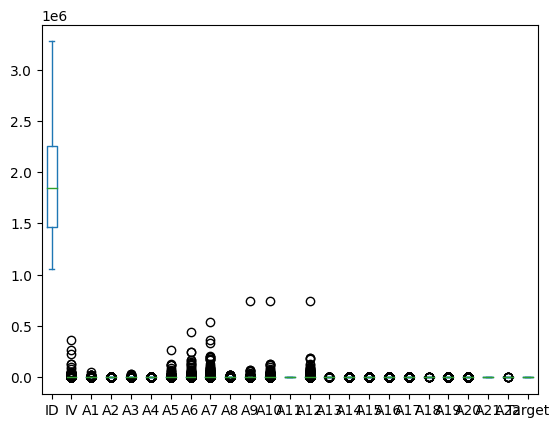

In [14]:
#checking outliers
df.plot(kind='box')

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#removing outliers
data_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

## Dataset balance

In [16]:
pd.crosstab(data_out['Target'],columns='N',normalize=True) 
#normalize true = show in %
#normalize false = show in count

col_0,N
Target,
0,0.659282
1,0.340718


In [17]:
#count of Target variable
data_out['Target'].value_counts()

0    8690
1    4491
Name: Target, dtype: int64

<Axes: ylabel='Target'>

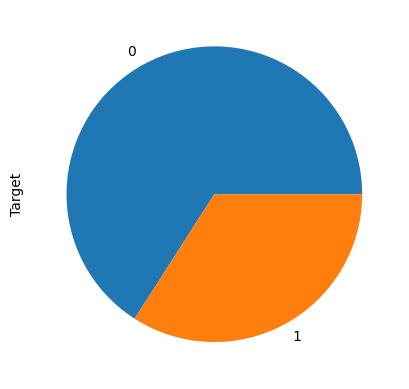

In [18]:
data_out['Target'].value_counts().plot.pie()

In [19]:
# Here we get the data as imbalanced. so using sampling for balancing.

## Under Sampling

In [20]:
#using under sampling(majority class of data points is reduced in order to balance the dataset and improve the performance of a predictive model.)
import imblearn # Imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(sampling_strategy=1)
X_res,y_res=rus.fit_resample(data_out.drop('Target', axis=1), data_out['Target'])
us= pd.concat([pd.DataFrame(y_res), pd.DataFrame(X_res)], axis=1)

In [21]:
y_res.value_counts()

0    4491
1    4491
Name: Target, dtype: int64

<Axes: title={'center': 'Under-Sampling'}, ylabel='Target'>

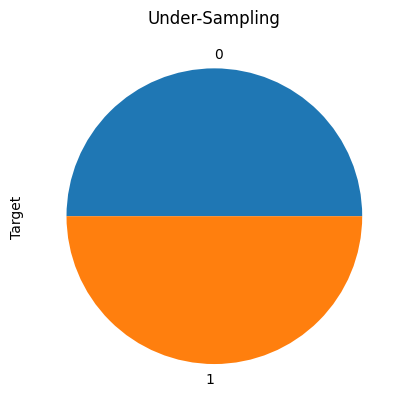

In [22]:
#visualizing 
y_res.value_counts().plot.pie(title='Under-Sampling')

In [23]:
pd.crosstab(us['Target'],columns='N',normalize=True)

col_0,N
Target,
0,0.5
1,0.5


In [24]:
# Now the data is balanced

## Removing irrelavent featues

In [25]:
#we saw that very value of A11 is same. so we can remove it.
#Also we don't need ID
us=us.drop(['ID','A11'],axis=1)

## Data partition

In [26]:
## Using sklearn split 70% of our data into training set and rest in test set.
from sklearn.model_selection import train_test_split
X = us.drop('Target',axis=1)
y = us[["Target"]]
#random_state is the seed used by the random number generator. It can be any integer.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =1) 


### Important features

In [27]:
#Applying Mutual info classifier to get Important Features
from sklearn.feature_selection import mutual_info_classif
# measure of how much information the presence of one variable gives about the other variable. 
mutual_info=mutual_info_classif(x_train,y_train)
mutual_info

array([0.17833632, 0.00981267, 0.0158826 , 0.        , 0.        ,
       0.23460855, 0.22633492, 0.21796947, 0.12658348, 0.14656357,
       0.13196078, 0.12028206, 0.00196828, 0.00558611, 0.02024024,
       0.01477442, 0.00161611, 0.        , 0.        , 0.        ,
       0.        , 0.01084039])

In [28]:
#convert array to series
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

A5     0.234609
A6     0.226335
A7     0.217969
IV     0.178336
A9     0.146564
A10    0.131961
A8     0.126583
A12    0.120282
A15    0.020240
A2     0.015883
A16    0.014774
A22    0.010840
A1     0.009813
A14    0.005586
A13    0.001968
A17    0.001616
A4     0.000000
A3     0.000000
A18    0.000000
A19    0.000000
A20    0.000000
A21    0.000000
dtype: float64

<Axes: >

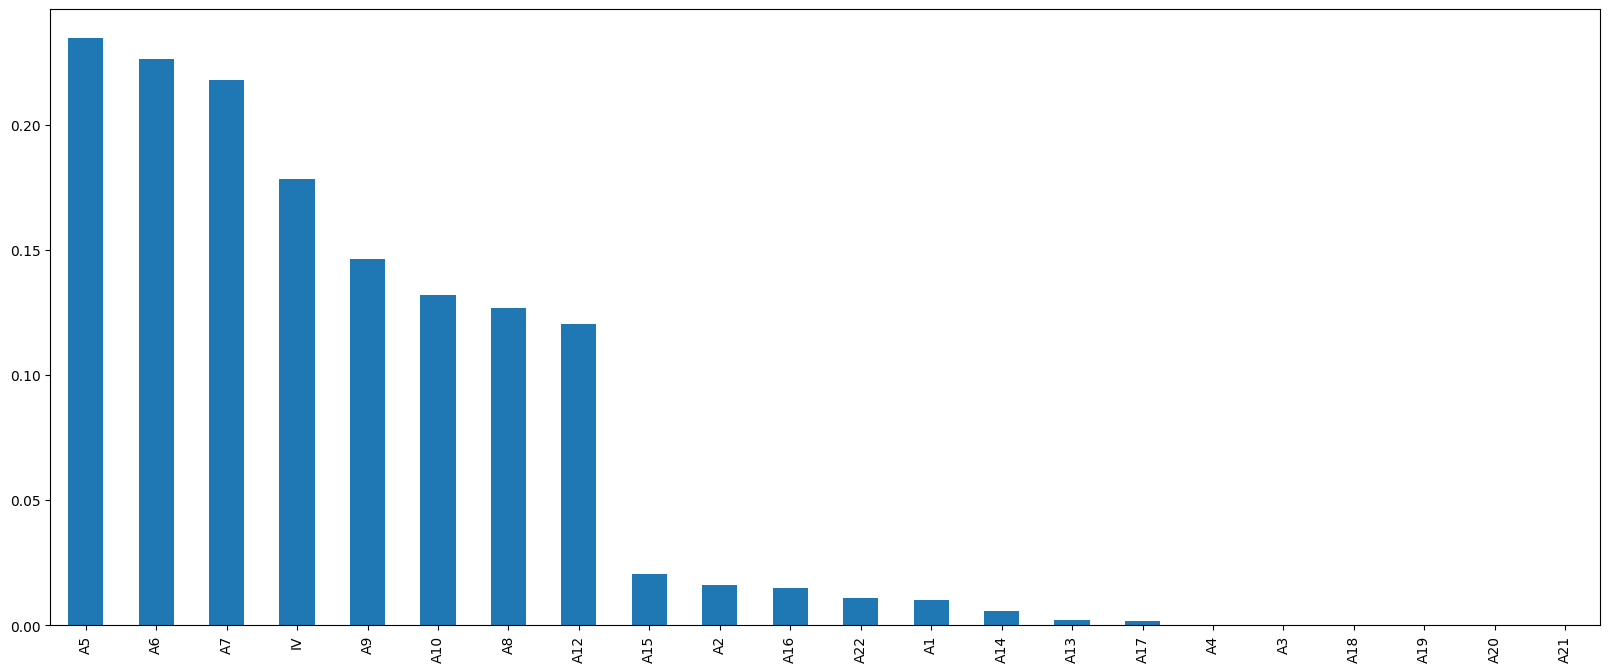

In [29]:
#visualize feature importance
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [30]:
#select how much feature we want
from sklearn.feature_selection import SelectKBest

In [31]:
#select top 10 features
sel_col=SelectKBest(mutual_info_classif,k=8)
sel_col.fit(x_train,y_train)
x_train.columns[sel_col.get_support()]

Index(['IV', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A12'], dtype='object')

In [32]:
#Selecting top 8 values and drop remaining
x_train=x_train.drop(['A1','A2','A3','A4','A13','A14','A15','A17','A18','A19','A20','A21','A22'],axis=1)

In [33]:
#Selecting top 8 values and drop remaining
x_test=x_test.drop(['A1','A2','A3','A4','A13','A14','A15','A17','A18','A19','A20','A21','A22'],axis=1)

In [34]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

In [35]:
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.827741 using {'alpha': 0.1}


In [36]:
final_mod = RidgeClassifier(alpha=.1)

In [37]:
final_mod.fit(x_train, y_train)
test_pred  =final_mod.predict(x_test)
train_pred  =final_mod.predict(x_train)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[2820  339]
 [ 744 2384]]


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[1199  133]
 [ 353 1010]]


Accuracy_score,f1_score,precision_score,recall_score shows how good is our model

##### 1.Accuracy shows model performance
##### 2.Precision shows how many coronary heart patients were predicted right in advance out of total postitives
##### 3.Recall shows how many coronary heart patients were predicted right in advance out of total correct postives

In [40]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
t_accuracy = accuracy_score(y_train,train_pred)
t_f1 = f1_score(y_train, train_pred )
t_precision = precision_score(y_train, train_pred )
t_recall = recall_score(y_train, train_pred )
accuracy = accuracy_score(y_test,test_pred)
f1 = f1_score(y_test, test_pred )
precision = precision_score(y_test, test_pred )
recall = recall_score(y_test, test_pred )

In [41]:
print('Train')
print(' Accuracy is  :' ,t_accuracy)
print(' Precision is  :',t_precision)
print(' Recall is  :',t_recall)
print(' F1 score is :' ,t_f1)
print('test')
print(' Accuracy is  :' ,accuracy)
print(' Precision is  :',precision)
print(' Recall is  :',recall)
print(' F1 score is :' ,f1)

Train
 Accuracy is  : 0.8277397804994433
 Precision is  : 0.8755049577671685
 Recall is  : 0.7621483375959079
 F1 score is : 0.8149034353102034
test
 Accuracy is  : 0.8196660482374768
 Precision is  : 0.8836395450568679
 Recall is  : 0.7410124724871606
 F1 score is : 0.8060654429369513


## Performing Logistic Regression

In [42]:
# import logistic regression
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
# fit the model to the training data
lr.fit(x_train,y_train)
# Predict the response for test dataset
test_pred  =lr.predict(x_test)
train_pred  =lr.predict(x_train)

### Confusion matrix for Train data

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[2724  435]
 [ 438 2690]]


### Confusion matrix for Test data

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[1153  179]
 [ 218 1145]]


In [45]:
t_accuracy = accuracy_score(y_train,train_pred)
t_f1 = f1_score(y_train, train_pred )
t_precision = precision_score(y_train, train_pred )
t_recall = recall_score(y_train, train_pred )
accuracy = accuracy_score(y_test,test_pred)
f1 = f1_score(y_test, test_pred )
precision = precision_score(y_test, test_pred )
recall = recall_score(y_test, test_pred )

In [46]:
print('Train')
print(' Accuracy is  :' ,t_accuracy)
print(' Precision is  :',t_precision)
print(' Recall is  :',t_recall)
print(' F1 score is :' ,t_f1)
print('test')
print(' Accuracy is  :' ,accuracy)
print(' Precision is  :',precision)
print(' Recall is  :',recall)
print(' F1 score is :' ,f1)

Train
 Accuracy is  : 0.8611420391283601
 Precision is  : 0.8608
 Recall is  : 0.8599744245524297
 F1 score is : 0.8603870142331681
test
 Accuracy is  : 0.8526901669758813
 Precision is  : 0.8648036253776435
 Recall is  : 0.8400586940572267
 F1 score is : 0.8522515816896167


## Performing DecisionTreeClassifier

In [47]:
#Import Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
#Train the model using the training sets
dt.fit(x_train, y_train)

#Predict the response for test dataset
test_pred = dt.predict(x_test)
train_pred = dt.predict(x_train)

### Confusion matrix for Train data

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[3139   20]
 [  41 3087]]


### Confusion matrix for Test data

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[1139  193]
 [ 201 1162]]


In [50]:
t_accuracy = accuracy_score(y_train,train_pred)
t_f1 = f1_score(y_train, train_pred )
t_precision = precision_score(y_train, train_pred )
t_recall = recall_score(y_train, train_pred )
accuracy = accuracy_score(y_test,test_pred)
f1 = f1_score(y_test, test_pred )
precision = precision_score(y_test, test_pred )
recall = recall_score(y_test, test_pred )

In [51]:
print('Train')
print(' Accuracy is  :' ,t_accuracy)
print(' Precision is  :',t_precision)
print(' Recall is  :',t_recall)
print(' F1 score is :' ,t_f1)
print('test')
print(' Accuracy is  :' ,accuracy)
print(' Precision is  :',precision)
print(' Recall is  :',recall)
print(' F1 score is :' ,f1)

Train
 Accuracy is  : 0.9902974391601718
 Precision is  : 0.9935629224332153
 Recall is  : 0.9868925831202046
 F1 score is : 0.9902165196471532
test
 Accuracy is  : 0.8538033395176252
 Precision is  : 0.8575645756457565
 Recall is  : 0.8525311812179017
 F1 score is : 0.8550404709345107


## Performing RandomForestClassifier

In [52]:
#import random forest. It reduces the variance by averaging the results of multiple decision trees
from sklearn.ensemble import RandomForestClassifier

# build a classifier
rf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
rf.fit(x_train, y_train)

#Predict the response for test dataset
test_pred = rf.predict(x_test)
train_pred = rf.predict(x_train)

### Confusion matrix for Train data

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[3135   24]
 [  37 3091]]


### Confusion matrix for Test data

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[1164  168]
 [ 119 1244]]


In [55]:
t_accuracy = accuracy_score(y_train,train_pred)
t_f1 = f1_score(y_train, train_pred )
t_precision = precision_score(y_train, train_pred )
t_recall = recall_score(y_train, train_pred )
accuracy = accuracy_score(y_test,test_pred)
f1 = f1_score(y_test, test_pred )
precision = precision_score(y_test, test_pred )
recall = recall_score(y_test, test_pred )

In [56]:
print('Train')
print(' Accuracy is  :' ,t_accuracy)
print(' Precision is  :',t_precision)
print(' Recall is  :',t_recall)
print(' F1 score is :' ,t_f1)
print('test')
print(' Accuracy is  :' ,accuracy)
print(' Precision is  :',precision)
print(' Recall is  :',recall)
print(' F1 score is :' ,f1)

Train
 Accuracy is  : 0.9902974391601718
 Precision is  : 0.9922953451043338
 Recall is  : 0.9881713554987213
 F1 score is : 0.9902290565433285
test
 Accuracy is  : 0.8935064935064935
 Precision is  : 0.8810198300283286
 Recall is  : 0.9126925898752751
 F1 score is : 0.8965765765765766


## performing KNearestNeighborsClassifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
test_pred = knn.predict(x_test)
train_pred = knn.predict(x_train)

### Confusion matrix for Train data

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[2709  450]
 [ 184 2944]]


### Confusion matrix for Test data

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[1106  226]
 [ 149 1214]]


In [60]:
t_accuracy = accuracy_score(y_train,train_pred)
t_f1 = f1_score(y_train, train_pred )
t_precision = precision_score(y_train, train_pred )
t_recall = recall_score(y_train, train_pred )
accuracy = accuracy_score(y_test,test_pred)
f1 = f1_score(y_test, test_pred )
precision = precision_score(y_test, test_pred )
recall = recall_score(y_test, test_pred )

In [61]:
print('Train')
print(' Accuracy is  :' ,t_accuracy)
print(' Precision is  :',t_precision)
print(' Recall is  :',t_recall)
print(' F1 score is :' ,t_f1)
print('test')
print(' Accuracy is  :' ,accuracy)
print(' Precision is  :',precision)
print(' Recall is  :',recall)
print(' F1 score is :' ,f1)

Train
 Accuracy is  : 0.8991569906155559
 Precision is  : 0.8674130819092516
 Recall is  : 0.9411764705882353
 F1 score is : 0.9027905550444648
test
 Accuracy is  : 0.8608534322820037
 Precision is  : 0.8430555555555556
 Recall is  : 0.8906823184152605
 F1 score is : 0.8662147698894043


## performing SupportVectorMachineClassifier

In [62]:

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

#predicting the Test set results
test_pred = classifier.predict(x_test)
train_pred = classifier.predict(x_train)

### Confusion matrix for Train data

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[2800  359]
 [ 476 2652]]


### Confusion matrix for Test data

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[1185  147]
 [ 238 1125]]


In [65]:
t_accuracy = accuracy_score(y_train,train_pred)
t_f1 = f1_score(y_train, train_pred )
t_precision = precision_score(y_train, train_pred )
t_recall = recall_score(y_train, train_pred )
accuracy = accuracy_score(y_test,test_pred)
f1 = f1_score(y_test, test_pred )
precision = precision_score(y_test, test_pred )
recall = recall_score(y_test, test_pred )

In [66]:
print('Train')
print(' Accuracy is  :' ,t_accuracy)
print(' Precision is  :',t_precision)
print(' Recall is  :',t_recall)
print(' F1 score is :' ,t_f1)
print('test')
print(' Accuracy is  :' ,accuracy)
print(' Precision is  :',precision)
print(' Recall is  :',recall)
print(' F1 score is :' ,f1)

Train
 Accuracy is  : 0.8671862573564498
 Precision is  : 0.8807705081368317
 Recall is  : 0.8478260869565217
 F1 score is : 0.863984362273986
test
 Accuracy is  : 0.8571428571428571
 Precision is  : 0.8844339622641509
 Recall is  : 0.8253851797505503
 F1 score is : 0.8538899430740037


## performing NaiveBayes Classifier

In [67]:
#
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(x_train, y_train)

#predicting the Test set results
test_pred = classifier.predict(x_test)
train_pred = classifier.predict(x_train)

### Confusion matrix for Train data

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[2419  740]
 [ 477 2651]]


### Confusion matrix for Test data

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[1031  301]
 [ 209 1154]]


In [70]:
t_accuracy = accuracy_score(y_train,train_pred)
t_f1 = f1_score(y_train, train_pred )
t_precision = precision_score(y_train, train_pred )
t_recall = recall_score(y_train, train_pred )
accuracy = accuracy_score(y_test,test_pred)
f1 = f1_score(y_test, test_pred )
precision = precision_score(y_test, test_pred )
recall = recall_score(y_test, test_pred )

In [71]:
print('Train')
print(' Accuracy is  :' ,t_accuracy)
print(' Precision is  :',t_precision)
print(' Recall is  :',t_recall)
print(' F1 score is :' ,t_f1)
print('test')
print(' Accuracy is  :' ,accuracy)
print(' Precision is  :',precision)
print(' Recall is  :',recall)
print(' F1 score is :' ,f1)

Train
 Accuracy is  : 0.8064259583267059
 Precision is  : 0.7817752875258036
 Recall is  : 0.8475063938618926
 F1 score is : 0.8133149256020863
test
 Accuracy is  : 0.8107606679035251
 Precision is  : 0.793127147766323
 Recall is  : 0.8466617754952311
 F1 score is : 0.8190205819730305


### Random Forest classifier is better model

In [72]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(n_estimators=100)
Model.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
Model.predict([[23,0,1,0,1,1,1,0,1]])

array([0], dtype=int64)

### Dump model

In [74]:
# importing 'pickle' to dump model
import pickle 
pickle.dump(Model,open('Model','wb'))